# Short beam longitudinal $\Delta_\parallel$ and transverse $\Delta_\bot$ offsets

Paper: [_Optimal laser focusing for positron production in laser-electron scattering_, Óscar Amaro and Marija Vranic 2021 New J. Phys. __23__ 115001](https://iopscience.iop.org/article/10.1088/1367-2630/ac2e83)

Preprint: https://arxiv.org/abs/2106.01877

In this notebook we show the consistency between the analytical expression for the a0eff distribution and particle sampling in a short beam geometry with longitudinal and transverse offsets.

In [1]:
import os
import sys
sys.path.append('../QScatter')
import QScatter
from QScatter import *

In [6]:
# parameters
# laser
lbd = 1; #[\mu m]
a0 = 1; #[]
W0 = 3; #[\mu m]
zR = pi*W0**2/lbd; #[\mu m] Rayleigh range
# beam
R = 8; #[\mu m]
sigmaR = R/sqrt(2); #[\mu m]
Nb = 1; #[]

In [7]:
# coordinate data
Nsmpl = int(5e6); #[]
DeltaL = 2*zR; #[\mu m]
DeltaT = 2*R; #[\mu m]
xdist = sigmaR*rng.standard_normal(Nsmpl) + DeltaT #[\mu m]
ydist = sigmaR*rng.standard_normal(Nsmpl) #[\mu m]
zdist = 0*rng.standard_normal(Nsmpl) + DeltaL #[\mu m]

# calculate a
adim = 200; #[]
nbins = adim; #[]
alst = np.linspace(0.01*a0,0.999*a0,adim); #[]
abins = np.linspace(0.01*a0,0.999*a0,nbins); #[]
da = abins[1]-abins[0]; #[]
adist = gauss3D(zdist, xdist, ydist, a0, W0, lbd) #[]

# get histograms
adist_y,adist_x = np.histogram(adist,abins)
# normalize to Nb
adist_y, adist_x = adist_y*Nb/Nsmpl, arraycenter(adist_x)
# analytical distribution
ath_y,ath_x = Nb * np.array([dNda_Short_3D(a, a0, R, W0, lbd, DeltaL, DeltaT) for a in alst]), alst
ath_y_0,ath_x_0 = Nb * np.array([dNda_Short_3D(a, a0, R, W0, lbd, 0, 0) for a in alst]), alst

/Users/oscar/Desktop/2023reduQED/reduQEDzenodo/a0effDist/../reduQED/reduQED.py:109: RuntimeWarning: invalid value encountered in sqrt
  return np.heaviside(a0*W0/W-a,0) * (W/R)**2 / a * (a/a0 * W/W0)**((W/R)**2) * iv(0,2*DeltaT/R * (W/R) * sqrt(log(a0/a * W0/W ))) * exp(-(DeltaT/R)**2);


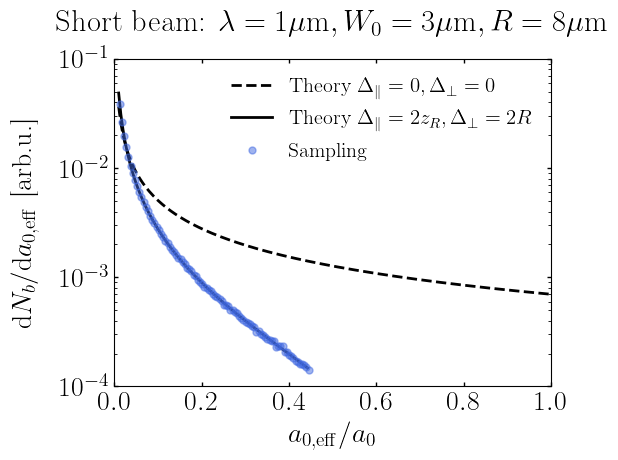

In [8]:
plt.style.use("../reduQED/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

plt.plot(ath_x_0/a0, ath_y_0*da,'k--',label=r'Theory $\Delta_\parallel=0,\Delta_\bot=0$')
plt.plot(ath_x/a0, ath_y*da,'-',color='black',label=r'Theory $\Delta_\parallel=2z_R,\Delta_\bot=2R$')
plt.plot(adist_x/a0, adist_y,'.',color='royalblue',label=r'Sampling',alpha=0.5)
plt.yscale('log')
plt.xlabel(r'$a_{0,\mathrm{eff}}/a_0$')
plt.ylabel(r'$\mathrm{d}N_b/\mathrm{d}a_{0,\mathrm{eff}}$ [arb.u.]',labelpad=15)
plt.legend(frameon=False)
plt.tick_params(which='both',axis="y",direction="in", labelleft=True, labelright=False, left=True, right=True)
plt.tick_params(which='both',axis="x",direction="in", labeltop=False, labelbottom=True, top=True, bottom=True)
plt.title(r'Short beam: $\lambda=1\mu\mathrm{m}, W_0=3\mu\mathrm{m},R=8\mu\mathrm{m}$ ')
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
#plt.yticks([1e-4,1e-3,1e-2,1e-1])
plt.ylim([1e-4,1e-1])
# aspect
axes.set_box_aspect(aspect=3/4)
# final
plt.tight_layout()
#plt.savefig('Short_3D_DeltaLT.pdf')
plt.show()